# Deep Learning in Medicine

## BMSC-GA 4493, BMIN-GA 3007

## Lab 9: Autoencoders

## Goal:
- denoising auto-encoder

In [22]:
from __future__ import print_function
import pickle 
import numpy as np
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.utils import make_grid
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

torch.manual_seed(1111);

## Data

In [164]:
batch_size = 64
# Data Loader
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
                   ])),
    batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
                   ])),
    batch_size=batch_size, shuffle=True)

In [165]:
def plot_digits(digits):
    grids = make_grid(digits, nrow=8)
    plt.figure(figsize=(12, 9))
    plt.imshow(grids.numpy()[0], cmap='gray')

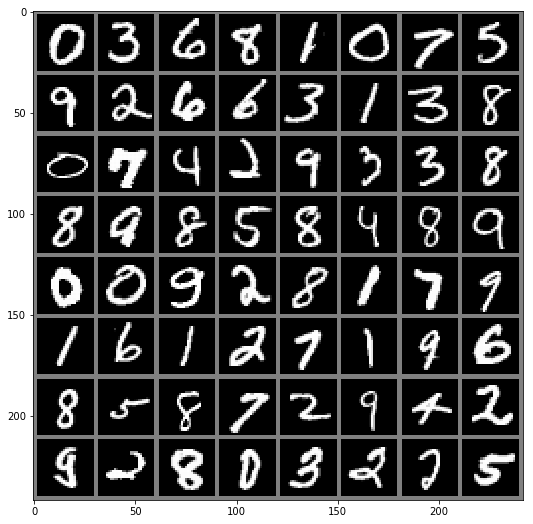

In [167]:
data, label = next(iter(train_loader))
plot_digits(data)

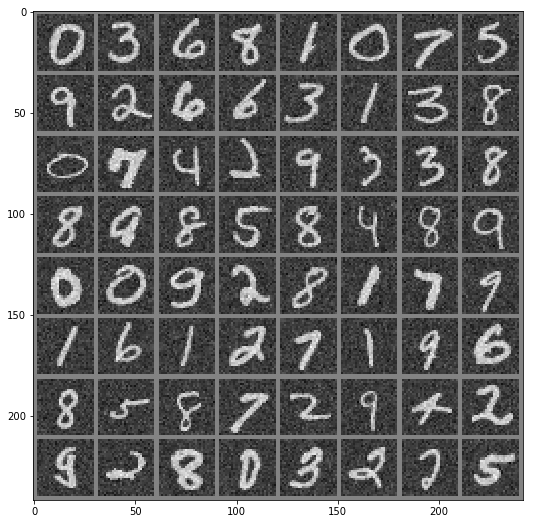

In [168]:
plot_digits(data + torch.FloatTensor(data.size()).normal_(mean=0, std=0.2))

## Model: Denoising Auto-encoder

As covered in class, there are mainly two components to an autoencoder: an encoder and a decoder. For this tutorial, we will be using a very simple model with just one hidden layer (not including the output layer), as shown by the image below. The decoder will just be the mirror of the encoder. Rather than learning an undercomplete representation, we will attempt to learn an overcomplete representation by training a [**sparse autoencoder**](https://web.stanford.edu/class/cs294a/sparseAutoencoder_2011new.pdf). In other words, the "code" that our autoencoder learn will be of the same dimension as the input data (28 * 28 = 784). We will, however, add a dropout layer to enforce the sparsity.

Another thing to note is that rather than treating out input as 2-dimensional (28 x 28), we will transform our input to 1-dimensional vectors (784) for simplicity.

<img src="https://cdn-images-1.medium.com/max/1600/1*ZEvDcg1LP7xvrTSHt0B5-Q@2x.png" alt="alt text" width="300" height="120">

Please fill in the code skeleton below to implement your own autoencoder. Think about the dimensions to the components of the modules (encoder and decoder). If you're looking for a more complex architecture, it would probably be better to write separate classes of Encoder and Decoder, then include them both in the model. However, since we're using pretty straightforward MLPs, we can do that in a single class by utilizing the ```nn.Sequential``` module.

In [206]:
class AutoEncoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, code_dim, dropout_rate=0.15):
        """
        :param input_dim: dimension of input to autoencoder
        :param hidden_dim: dimension of hidden layer in encoder and decoder
        :param code_dim: dimension of code in autoencoder
        """
        super(AutoEncoder, self).__init__()
        # TODO: initialize your Encoder and Decoder class with the given parameters
        self.encoder = nn.Sequential(
                                     nn.Linear(sizes),
                                     nn.ReLU(True),
                                     nn.Linear(sizes),
                                     nn.ReLU(True)
                                    )
        self.decoder = nn.Sequential(
                                     nn.Linear(sizes,),
                                     nn.ReLU(True),
                                     nn.Linear(sizes,),
                                     nn.Tanh())
        self.dropout = nn.Dropout(p=dropout_rate)
        
    def forward(self, x):
        """
        Forward function for the autoencoder. Remember to add dropout to enforce sparsity!
        Return both the output from the decoder and the code from the encoder
        :return output, code
        """
        # TODO: autoencoder forward function
        code = 
        # add dropout
        out = 
        return out, code

## Training

Next, we will train our autoencoder to denoise handwritten digit image data. Use the functions below and complete the code where necessary. Think about what kind of loss to use as the reconstruction loss for this task.

In [195]:
def test_model(loader, model, limit=None):
    """
    Help function that tests the models's performance on a dataset
    :param: loader: data loader for the dataset to test against
    """
    loss = 0
    num_samples = 0
    
    model.eval()
    
    predictions = []
    truths = []
    
    for i, (data, labels) in enumerate(loader):
        if i and i==limit:
            break
        data_noise = data + torch.FloatTensor(data.size()).normal_(std=NOISE_STD)
        outputs, _ = model(Variable(data_noise.squeeze().view(-1, 28 * 28)))

        # compute loss
        loss += loss_function(outputs, Variable(data)).data[0] * data.size()[0]
        num_samples += data.size()[0]

    return loss/num_samples

In [196]:
def train(num_epoch, model):
    for epoch in range(num_epoch):
        for i, (data, labels) in enumerate(train_loader):
            model.train()
            # add gaussian noise to data
            data_noise = data + torch.FloatTensor(data.size()).normal_(std=NOISE_STD)
            
            outputs, _ = model(Variable(data_noise.squeeze().view(-1, 28 * 28)))
            model.zero_grad()
            loss = loss_function(outputs, Variable(data))
            loss.backward()
            optimizer.step()

             # report performance
            if (i + 1) % LOG_INTERVAL == 0:
                test_loss = test_model(test_loader, model)
                print('Epoch: [{0}/{1}], Step: [{2}/{3}], Loss: {4}, Validation Loss:{5}'.format(
                    epoch + 1, EPOCHS, i + 1, len(train_loader), loss.data[0], test_loss))

In [197]:
EPOCHS = 6
LOG_INTERVAL = 300

LR = 0.002
NOISE_STD = 0.2

model = AutoEncoder(28 * 28, 200, 784) 

# TODO: loss function for reconstruction loss
loss_function = 

optimizer = torch.optim.Adam(model.parameters(), lr=LR)

train(EPOCHS, model)

Epoch: [1/8], Step: [300/938], Loss: 0.07643444091081619, Validation Loss:0.07220487874746323
Epoch: [1/8], Step: [600/938], Loss: 0.06119394302368164, Validation Loss:0.052346926873922346
Epoch: [1/8], Step: [900/938], Loss: 0.05174965411424637, Validation Loss:0.04368469765782356
Epoch: [2/8], Step: [300/938], Loss: 0.044579215347766876, Validation Loss:0.039610307568311694
Epoch: [2/8], Step: [600/938], Loss: 0.04610619693994522, Validation Loss:0.037169170546531675
Epoch: [2/8], Step: [900/938], Loss: 0.04311852902173996, Validation Loss:0.036433051872253416
Epoch: [3/8], Step: [300/938], Loss: 0.03700292855501175, Validation Loss:0.03497929447889328
Epoch: [3/8], Step: [600/938], Loss: 0.03862004354596138, Validation Loss:0.03448105390667915
Epoch: [3/8], Step: [900/938], Loss: 0.041771240532398224, Validation Loss:0.033573612734675407
Epoch: [4/8], Step: [300/938], Loss: 0.038488730788230896, Validation Loss:0.03328502182364464
Epoch: [4/8], Step: [600/938], Loss: 0.0391283072531

## Visualize Results

Let's take a look at how we can use our trained model:

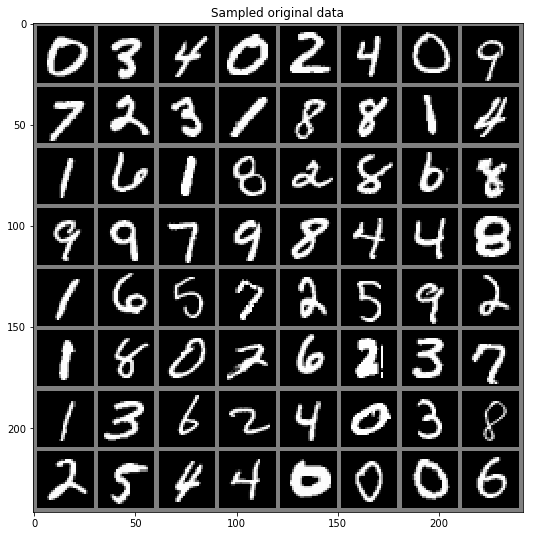

In [198]:
data, label = next(iter(test_loader))
plot_digits(data)
plt.title("Sampled original data")

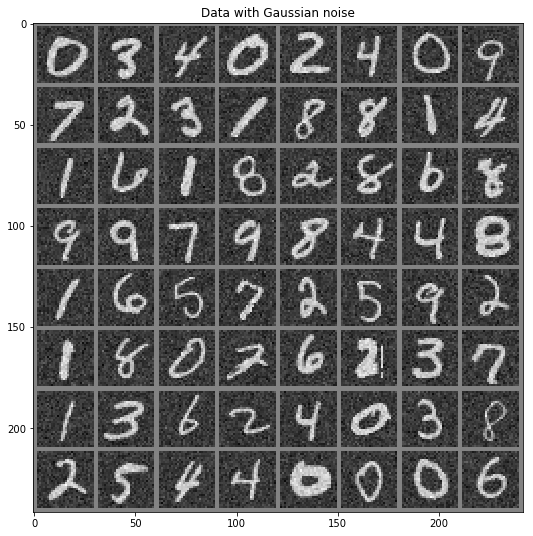

In [199]:
data_noise = data + torch.FloatTensor(data.size()).normal_(mean=0, std=NOISE_STD)
plot_digits(data_noise)
plt.title("Data with Gaussian noise")

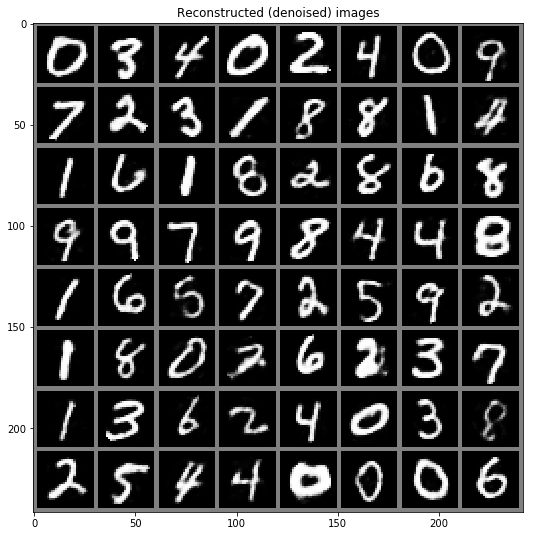

In [205]:
# denoise the data
model.eval()
reconstruction, _ = model(Variable(data_noise.view(-1, 28 * 28)))

reconstruction = reconstruction.view(-1, 1, 28, 28).data
plot_digits(reconstruction)
plt.title("Reconstructed (denoised) images")